In [20]:
import torch.optim as optim
import math
def cosine_lr_scheduler(optimizer, warmup_iters, num_iters, lr_max, lr_min):
    """
    Cosine learning rate scheduler.

    Args:
        optimizer (torch.optim.Optimizer): The optimizer to use.
        warmup_iters (int): The number of warmup iterations.
        num_iters (int): The total number of iterations.
        lr_max (float): The maximum learning rate.
        lr_min (float): The minimum learning rate.
    """

    def lr_lambda(global_step: int):
        if global_step < warmup_iters:
            return float(global_step) / float(max(1.0, warmup_iters))
        return 0.5 * (1.0 + math.cos(math.pi * (global_step - warmup_iters) / float(max(1.0, num_iters - warmup_iters))))

    return optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)


In [21]:
optimizer = optim.Adam(model.parameters())
scheduler = cosine_lr_scheduler(optimizer, warmup_iters=100, num_iters=10000, lr_max=1e-3, lr_min=1e-5)

for epoch in range(100):
    # Train the model
    optimizer.zero_grad()
    loss = model(x, y)
    loss.backward()
    optimizer.step()

    # Update the learning rate
    scheduler.step()


NameError: name 'model' is not defined

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
import tqdm
from custom_data import Winding_Dataset
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import random_split
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix,accuracy_score
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("runs", current_time)
writer = SummaryWriter(log_dir=log_dir)
def topk_error(preds, labels, k):
    topk_preds = preds.topk(k, dim=1)[1]
    correct = topk_preds.eq(labels.view(-1, 1).expand_as(topk_preds))
    correct_k = correct.view(-1).float().sum(0, keepdim=True)
    error = 1 - correct_k.div_(labels.size(0))
    return error.item()


class ClassifierModel(nn.Module):
    def __init__(self, num_features, num_classes):
        super(ClassifierModel, self).__init__()
        self.fc = nn.Sequential(
                # nn.Linear(num_features, 500),
                # nn.ReLU(),
                nn.Linear(num_features, num_classes),
                nn.Sigmoid()
            )

    def forward(self, x):
        x = self.fc(x)
        return x

barlow=False
small_train=True
if small_train:
    data_path="/home/vault/rzku/mrvl005h/data/Image_data/single_class/"
else:
    data_path="/scratch/mrvl005h/Image_data/single_class/"
if barlow:
    model_path = "barlowtwins_weights.pt"
    barlow_weight = torch.load(model_path, map_location=torch.device('cpu'))
    barlow_backbone = torchvision.models.resnet50(pretrained=False)
    barlow_backbone = nn.Sequential(*list(barlow_backbone.children())[:-1])
else:
    model_path="meta_checkpoint.pt"
    barlow_weight = torch.load(model_path,map_location=torch.device('cpu'))
    barlow_backbone = torchvision.models.resnet50(pretrained=False)
    barlow_backbone.fc= nn.Identity()

barlow_backbone.load_state_dict(barlow_weight)
barlow_backbone.eval()
classifier_model = ClassifierModel(num_features=2048, num_classes=4)
##
classification_criterion = nn.BCELoss()
dataset=Winding_Dataset("labels.csv",data_path)
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=True, num_workers=0)
# Define your optimizer for the classifier head (e.g., Adam, SGD, etc.)
classification_optimizer = optim.Adam(classifier_model.parameters())
num_epochs = 100

/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import torch
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
from torch import nn
import torchvision
from torchvision import transforms
from custom_data import Winding_Dataset
from PIL import Image
import matplotlib.pyplot as plt
data_path="/home/vault/rzku/mrvl005h/data/Image_data/single_class/"

validation_dataset=Winding_Dataset("validation_set.csv",data_path)
    # test_size = int(0.2 * len(dataset))
    # train_size = len(dataset) - test_size
    # train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

validation_loader=DataLoader(validation_dataset, batch_size=10, shuffle=True, num_workers=0)

In [ ]:
model_path = "barlowtwins_weights.pt"
barlow_weight = torch.load(model_path, map_location=torch.device('cpu'))
barlow_backbone = torchvision.models.resnet50(pretrained=False)
lightly_model = nn.Sequential(*list(barlow_backbone.children())[:-1])
lightly_model.load_state_dict(barlow_weight)
lightly_model.eval()

/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
model_path="meta_checkpoint.pt"
barlow_weight = torch.load(model_path,map_location=torch.device('cpu'))
meta_model = torchvision.models.resnet50(pretrained=False)
meta_model.fc= nn.Identity()
meta_model.load_state_dict(barlow_weight)
meta_model.eval()

/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt
input=torch.randn(3,224,224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


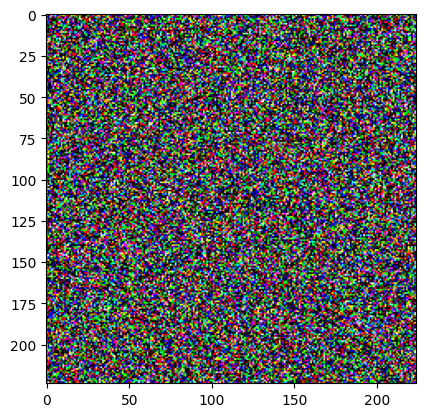

In [ ]:
img= input.numpy()
plt.imshow(img.transpose(1,2,0))
plt.show()

In [ ]:
m=nn.R()
output=m(input)
img= output.numpy()
plt.imshow(img.transpose(1,2,0))
plt.show()

AttributeError: module 'torch.nn' has no attribute 'relu'

/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


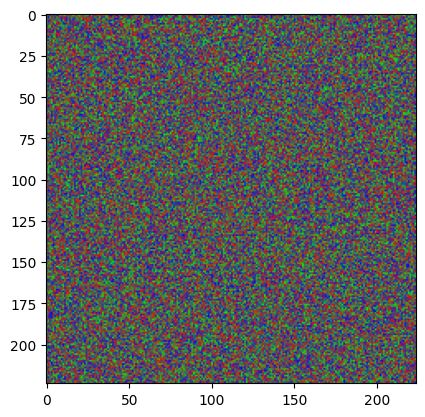

In [ ]:
m=nn.Softmax()
output=m(input)
img= output.numpy()
plt.imshow(img.transpose(1,2,0))
plt.show()

In [19]:
sum(output[0][0])

tensor([71.6329, 74.2245, 68.7004, 76.2530, 75.0489, 72.1308, 78.7134, 78.2501,
        77.8006, 76.9917, 74.2375, 71.7923, 78.9768, 71.2102, 73.3750, 73.3323,
        73.9407, 79.0021, 73.2947, 75.5953, 71.5975, 66.8799, 71.3833, 73.4837,
        84.6342, 78.9739, 74.5571, 74.6415, 72.5045, 70.7543, 74.6088, 74.1028,
        81.9365, 76.5272, 70.8217, 72.8414, 75.4127, 68.8138, 71.2866, 79.1877,
        78.3981, 73.9888, 75.2366, 74.3187, 77.4825, 82.4308, 76.1778, 70.9540,
        74.8967, 75.1459, 73.0417, 78.6731, 76.6616, 77.0312, 79.8081, 70.2651,
        73.7956, 79.0384, 74.5342, 82.8211, 69.1684, 79.3643, 71.9161, 76.4951,
        72.1344, 73.1447, 82.7308, 72.2182, 76.6040, 73.7747, 75.0887, 71.4193,
        72.9434, 70.6357, 69.2642, 72.3777, 75.3110, 74.8132, 76.1183, 70.2539,
        74.6059, 73.3269, 74.2587, 73.7756, 76.2462, 79.9127, 80.0752, 74.3299,
        74.2533, 77.5500, 69.3896, 76.8197, 75.0232, 73.7228, 78.3891, 77.1386,
        76.5883, 75.6178, 74.2174, 73.70

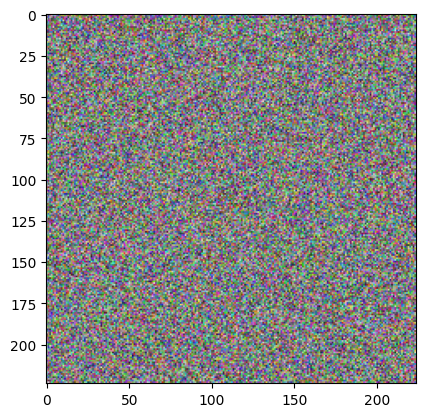

In [12]:
m=nn.Sigmoid()
output=m(input)
img= output.numpy()
plt.imshow(img.transpose(1,2,0))
plt.show()

In [3]:
resnet_model = torchvision.models.resnet50(pretrained=False)


/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hpc/rzku/mrvl005h/miniconda3/envs/ffcv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [21]:
image,label=next(iter(validation_loader))

/home/vault/rzku/mrvl005h/Self-Supervised-Learning/custom_data.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = torch.tensor(labels, dtype=torch.float32)


tensor([1., 1., 1.])


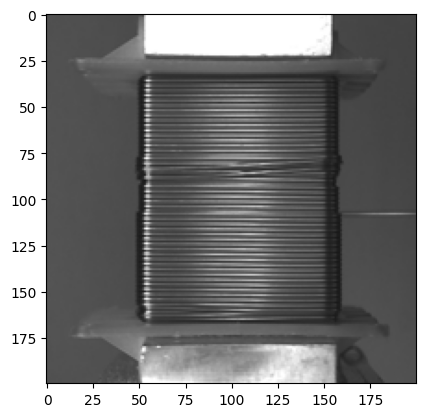

In [26]:
#input_data
print(label[0])
img= image[0].numpy()
plt.imshow(img.transpose(1,2,0))
plt.show()

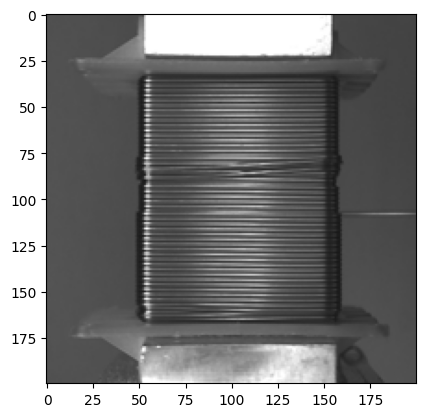

In [31]:
#meta training
out=meta_model.relu(image[0]).detach().numpy().transpose(1,2,0) #display the 1st non-linear layer
plt.imshow(out)

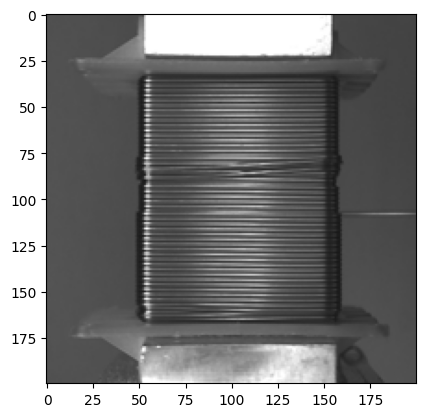

In [32]:
#barlow_twins
out=lightly_model[2](image[0]).detach().numpy().transpose(1,2,0) #display the 1st non-linear layer
plt.imshow(out)

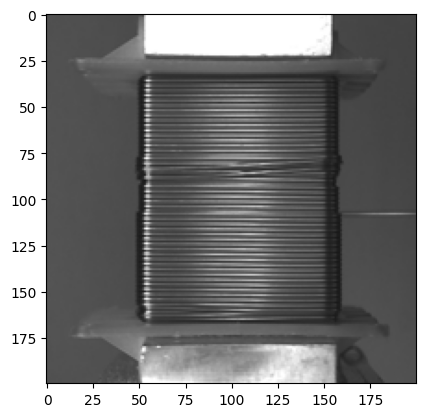

In [33]:
#meta training
act=barlow_backbone.layer1[1].relu(image[0]).detach().numpy().transpose(1,2,0) #display the 1st non-linear layer
plt.imshow(act)

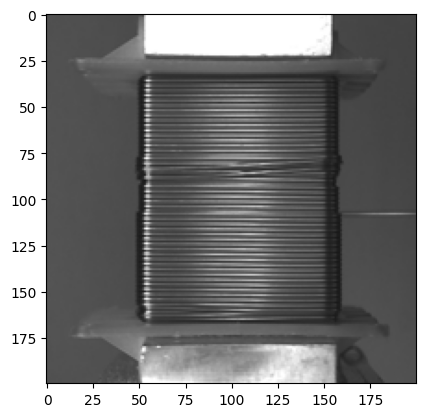

In [35]:
act=lightly_model[4][2].relu #relu at 4 bottelneck
output=act(image[0])
img=output.detach().numpy().transpose(1,2,0)
plt.imshow(img)

In [36]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models, transforms

torch.Size([1, 3, 200, 200])


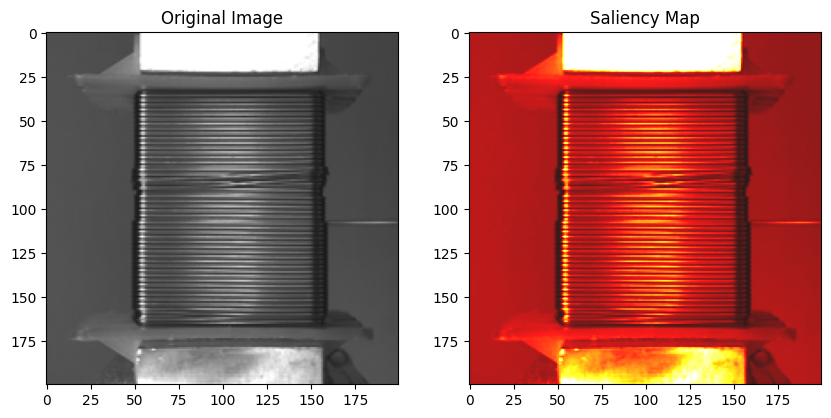

In [42]:
input_batch=image[0].unsqueeze(0)
print(input_batch.shape)
output = meta_model(input_batch)

# Calculate the gradient of the output with respect to the input
barlow_backbone.zero_grad()
output[0, output.argmax()].backward()  # Backward pass with respect to the most confident class

# Get the gradient from the input tensor
saliency_map = input_batch.data.abs().max(dim=1)[0]

# Normalize the saliency map to values between 0 and 1
saliency_map = saliency_map / saliency_map.max()

# Convert the saliency map to a NumPy array
saliency_map = saliency_map.squeeze().numpy()

# Plot the original image and the saliency map side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image[0].numpy().transpose(1,2,0)    )
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='hot', alpha=0.9)
plt.title('Saliency Map')

plt.show()

torch.Size([1, 3, 200, 200])


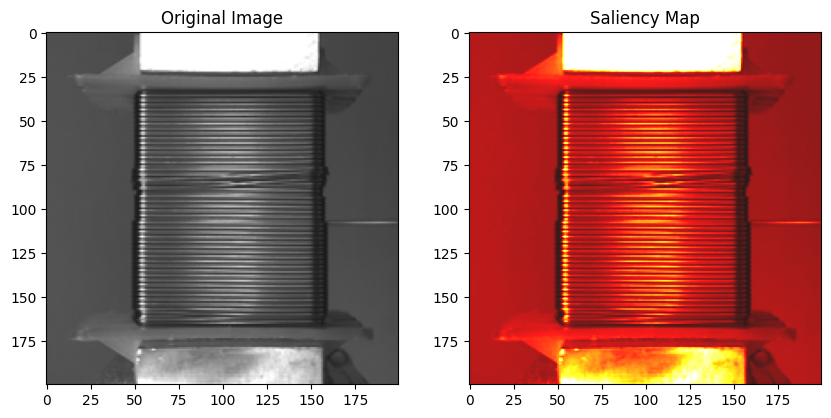

In [41]:

# Forward pass to get the model prediction barlowtwins
input_batch=image[0].unsqueeze(0)
print(input_batch.shape)
output = lightly_model(input_batch)

# Calculate the gradient of the output with respect to the input
barlow_backbone.zero_grad()
output[0, output.argmax()].backward()  # Backward pass with respect to the most confident class

# Get the gradient from the input tensor
saliency_map = input_batch.data.abs().max(dim=1)[0]

# Normalize the saliency map to values between 0 and 1
saliency_map = saliency_map / saliency_map.max()

# Convert the saliency map to a NumPy array
saliency_map = saliency_map.squeeze().numpy()

# Plot the original image and the saliency map side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image[0].numpy().transpose(1,2,0)    )
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='hot', alpha=0.9)
plt.title('Saliency Map')

plt.show()

In [101]:
import cv2
def attention_cropping(image, saliency_map, threshold):
    # Convert saliency map to grayscale
    saliency_map_gray = cv2.cvtColor(saliency_map, cv2.COLOR_BGR2GRAY)

    # Binarize saliency map
    binarize_saliency_map = np.where(saliency_map_gray > threshold, 255, 0)

    # Apply watershed algorithm
    watershed_image = cv2.watershed(binarize_saliency_map)

    # Find the largest region in the segmented image
    max_region = np.amax(watershed_image)

    # Crop the image to the largest region
    cropped_image = image[
        watershed_image == max_region, :
    ]  # [y : y+h, x : x+w]

    return cropped_image

In [119]:
saliency_map.shape

(200, 200)

In [122]:
image[0][0].shape

torch.Size([200, 200])

In [138]:
cropped_image=attention_cropping(image[99].numpy().transpose(1,2,0),saliency_map,0.5)